## Саммари по экспериментру. 
В этом блoкноте собраны настроки астры и параметры рейтресинга.
и результирующие траектории

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import summary
summary.widget()


In [2]:
summary.print_info(['Freq', 'xmi2', 'inew'])


                   Freq_0.6.zip                                      Freq_0.8.zip                   
 ================= ASTRA summary ================= ================= ASTRA summary =================
 Astra folder  D:\cygwin64\home\tmp8\ASTRA-6\a4    Astra folder  D:\cygwin64\home\tmp8\ASTRA-6\a4   
 exp file      40167_01.exp                        exp file      40167_01.exp                       
 equ file      40167_01.equ                        equ file      40167_01.equ                       
 Computer name  Zen5                               Computer name  Zen5                              
 ============= Ray tracing parameters ============= ============= Ray tracing parameters =============
 Freq:  0.6 (GHz)                                  Freq:  0.8 (GHz)                                 
 xmi2:  16.0 (Mi2/Mp)                              xmi2:  16.0 (Mi2/Mp)                             
 inew:  1 (int)                                    inew:  1 (int)                        

In [3]:
import race
R1 = race.Race(summary.selected_races[0])
print(len(R1.traj_list))
print(R1.traj_list[0])

100
lhcd/out/traj.1800734705943335.dat


In [4]:
print(len(R1.radial_data_list))
print(R1.radial_data_list[1])
profiles = R1.read_radial_data(R1.radial_data_list[1])
print(profiles.keys())
profiles['Time']

80
dat/40167_01.exp.40167_01.equ.1
dict_keys(['a', 'J', 'Plh', 'Johm', 'E', 'Te', 'En', 'CC', 'Q', 'Jlh', 'Upl', 'Zef', 'Poh', 'Ne', 'sig', 'Chr', 'Time'])


0.11

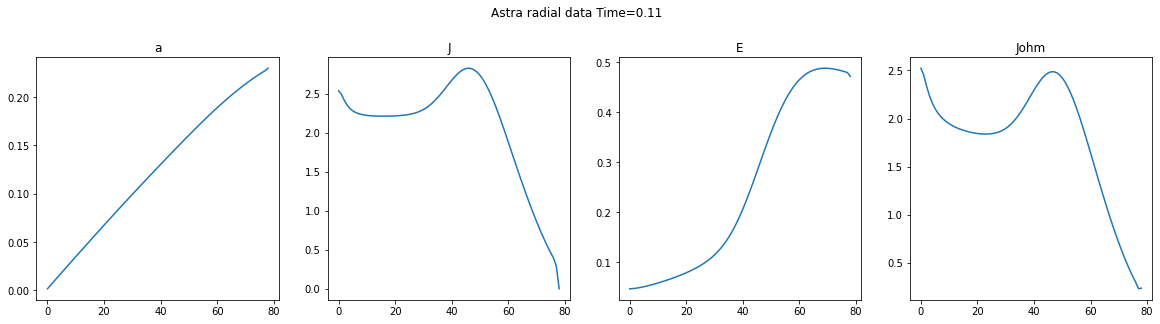

In [5]:
import matplotlib.pyplot as plt


grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle('Astra radial data Time={0}'.format(profiles['Time']))
ax1.plot(profiles['a'])
ax1.set_title("a")
ax1.set_box_aspect(1)

ax2.plot(profiles['J'])
ax2.set_title("J")
ax2.set_box_aspect(1)

ax3.plot(profiles['E'])
ax3.set_title("E")
ax3.set_box_aspect(1)

ax4.plot(profiles['Johm'])
ax4.set_title("Johm")
ax4.set_box_aspect(1)

In [6]:
summary.selected_races[0]

'Freq_0.6.zip'

In [7]:
from ipywidgets import interactive
import race
R1 = race.Race(summary.selected_races[0])
R2 = race.Race(summary.selected_races[1])
def plot_func(index):
    profiles = R1.read_radial_data(R1.radial_data_list[index-1])
    profiles2 = R2.read_radial_data(R2.radial_data_list[index-1])
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

    fig, axs = plt.subplots(3, 2, figsize=(10, 10))

    fig.suptitle('Astra radial data Time={0}'.format(profiles['Time']))
    #fig.suptitle(R1.radial_data_list[index-1])
    axs[0,0].plot(profiles['a'])
    axs[0,0].plot(profiles2['a'])    
    axs[0,0].set_title("a")

    axs[1,0].plot(profiles['J'])
    axs[1,0].plot(profiles2['J'])
    axs[1,0].set_title("J")

    axs[0,1].plot(profiles['E'])
    axs[0,1].plot(profiles2['E'])    
    axs[0,1].set_title("E")
    
    axs[1,1].plot(profiles['Johm'])
    axs[1,1].plot(profiles2['Johm'])    
    axs[1,1].set_title("Johm")
    
    delta = [p1-p2 for p1,p2 in zip(profiles['Johm'],profiles2['Johm'])]
    axs[2,1].plot(delta)
    axs[2,1].set_title("delta Johm")    

    delta2 = [p1-p2 for p1,p2 in zip(profiles['J'],profiles2['J'])]
    axs[2,0].plot(delta2)
    axs[2,0].set_title("delta J")  
    #for a in axs:
    #    a.set_box_aspect(1.5)
    plt.show()
 
w = interactive(plot_func, index = (1, len(R2.radial_data_list)))
w

interactive(children=(IntSlider(value=40, description='index', max=80, min=1), Output()), _dom_classes=('widge…

In [22]:
import astra
astra.summary()

 ======  ASTRA summary =====
Astra folder  D:\cygwin64\home\tmp8\ASTRA-6\a4
exp file      40167_01.exp
equ file      40167_02.equ


In [ ]:
import ray_tracing
ray_tracing.summary()

 ====================  Ray tracing summary ====================
Physical parameters                  rrange    0.0001                    Options                            
Freq      1.0                        eps       1e-06                     ipri      2                        
xmi1      2.0                        hdrob     1.5                       iw        -1                       
zi1       1.0                        cleft     0.7                       ismth     0                        
xmi2      16.0                       cright    1.5                       ismthalf  0                        
zi2       8.0                        cdel      0.25                      ismthout  1                        
dni2      0.03                       rbord     0.999                     inew      0                        
xmi3      1.0                        pchm      0.2                       itor      1                        
zi3       1.0                        pabs      0.01             

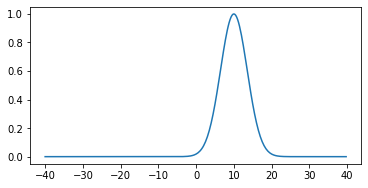

In [ ]:
ray_tracing.plot_spectrum()